In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ======================
# Folder Structure Setup
# ======================
def setup_folders():
    """Create standardized folder structure"""
    folders = [
        'data/raw',
        'data/processed',
        'data/final',
        'figures/load_analysis',
        'figures/price_analysis',
        'figures/flexibility'
    ]
    for folder in folders:
        os.makedirs(folder, exist_ok=True)

setup_folders()

In [34]:
# ======================
# Step 1: Data Generation
# ======================
def generate_power_data():
    date_range = pd.date_range(start="2023-01-01", end="2023-01-07", freq="h")
    
    # Generate load data (simplified formula)
    hours = np.arange(len(date_range))
    load = (
        30000 
        + 5000 * np.sin(hours * (2 * np.pi / 24))
        + np.random.normal(0, 500, len(date_range))
    )
    
    df = pd.DataFrame({
        "DateTime": date_range,
        "TotalLoad": load
    })
    
    df.to_csv("data/raw/power_data.csv", index=False)
    print("✅ Step 1: Raw data saved to data/raw/power_data.csv")
    return df

df_power = generate_power_data()

✅ Step 1: Raw data saved to data/raw/power_data.csv


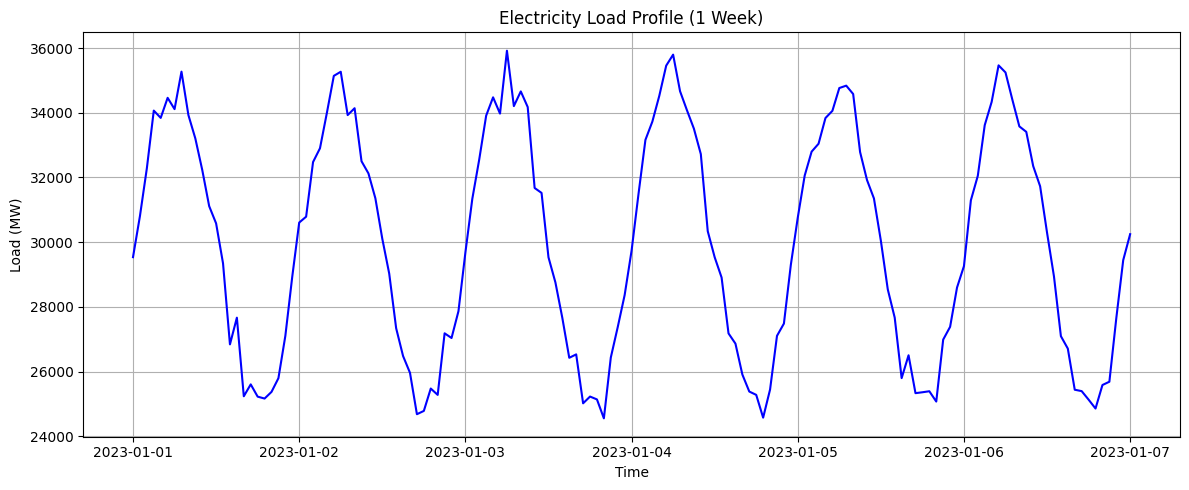

✅ Step 2: Plot saved to figures/load_analysis/load_profile.png


In [44]:
# ======================
# Step 2: Load Visualization
# ======================
def plot_load_profile(df):
    plt.figure(figsize=(12, 5))
    plt.plot(df["DateTime"], df["TotalLoad"], color="blue")
    plt.title("Electricity Load Profile (1 Week)")
    plt.xlabel("Time")
    plt.ylabel("Load (MW)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/load_analysis/load_profile.png", dpi=300)
    plt.show()
    plt.close()
    print("✅ Step 2: Plot saved to figures/load_analysis/load_profile.png")

plot_load_profile(df_power)

In [36]:
# ======================
# Step 3: Add Renewables
# ======================
def add_renewables(df):
    hours = np.arange(len(df))
    
    # Wind generation (higher at night)
    df["WindGeneration"] = (
        4000 
        + 3000 * np.sin(hours * (2 * np.pi / 24) + np.pi/2) 
        + np.random.normal(0, 800, len(df))
    )
    
    # Solar generation (daytime only)
    solar = 2500 * np.sin((hours % 24) * (np.pi / 24))
    df["SolarGeneration"] = np.where(solar < 0, 0, solar) + np.random.normal(0, 300, len(df))
    
    df.to_csv("data/processed/power_with_renewables.csv", index=False)
    print("✅ Step 3: Data saved to data/processed/power_with_renewables.csv")
    return df

df_power = add_renewables(df_power)

✅ Step 3: Data saved to data/processed/power_with_renewables.csv


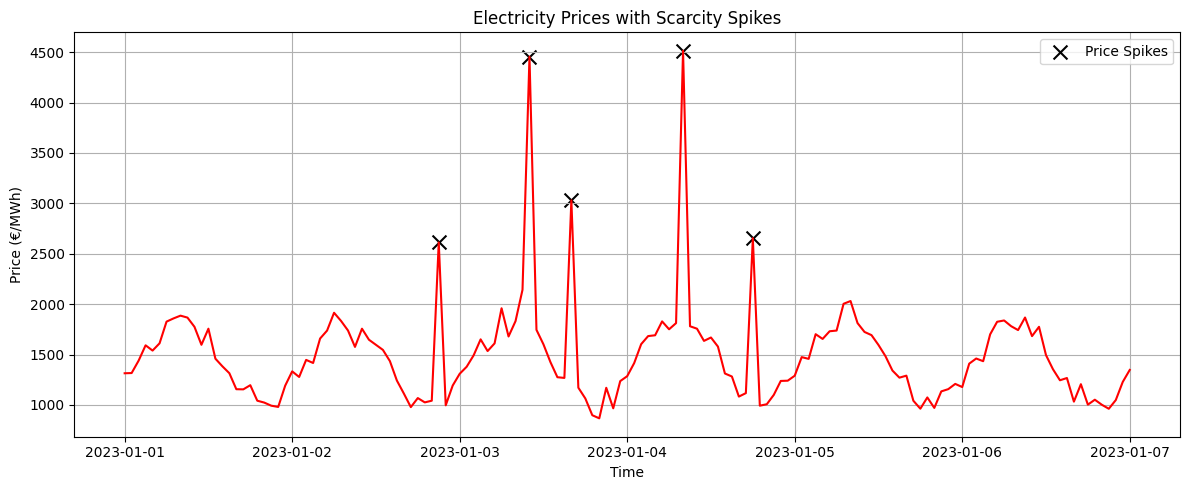

✅ Step 4: Data and plot saved to:
   - data/processed/power_with_prices.csv
   - figures/price_analysis/price_simulation.png


In [43]:
# ======================
# Step 4: Price Simulation
# ======================
def simulate_prices(df):
    df["ResidualLoad"] = df["TotalLoad"] - df["WindGeneration"] - df["SolarGeneration"]
    
    # Non-linear price formula
    df["Price"] = (
        35 
        + (df["ResidualLoad"] ** 1.4) / 1000 
        + np.random.normal(0, 2, len(df))
    )
    
    # Add price spikes
    spikes = np.random.choice(df.index, 5, replace=False)
    df.loc[spikes, "Price"] *= 2.5
    df["IsSpike"] = False
    df.loc[spikes, "IsSpike"] = True
    
    # Save and plot
    df.to_csv("data/processed/power_with_prices.csv", index=False)
    
    plt.figure(figsize=(12, 5))
    plt.plot(df["DateTime"], df["Price"], color="red")
    plt.scatter(
        df.loc[spikes, "DateTime"],
        df.loc[spikes, "Price"],
        color="black", marker="x", s=100, label="Price Spikes"
    )
    plt.title("Electricity Prices with Scarcity Spikes")
    plt.xlabel("Time")
    plt.ylabel("Price (€/MWh)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/price_analysis/price_simulation.png", dpi=300)
    plt.show()
    plt.close()
    
    print("✅ Step 4: Data and plot saved to:")
    print("   - data/processed/power_with_prices.csv")
    print("   - figures/price_analysis/price_simulation.png")
    return df

df_power = simulate_prices(df_power)

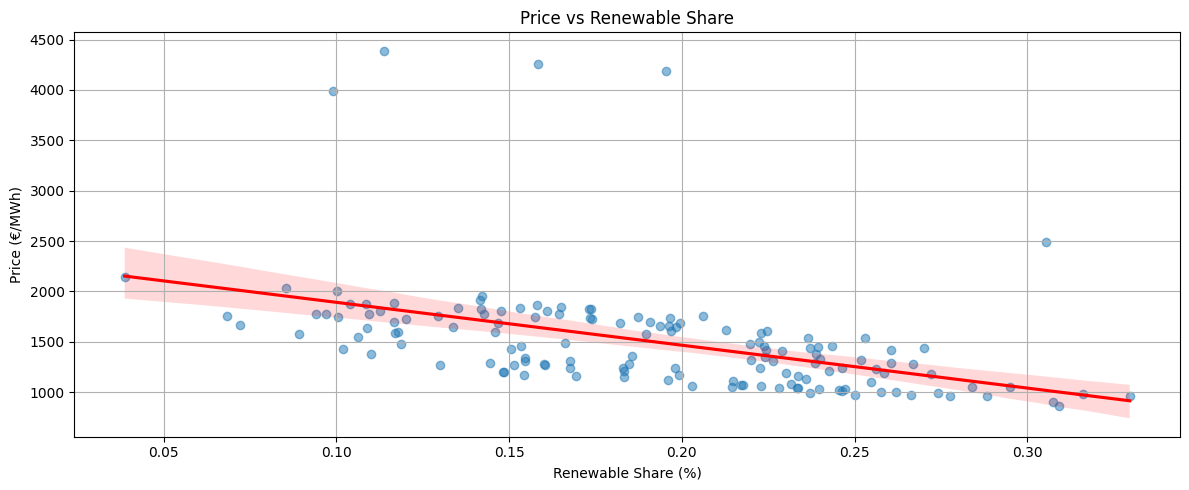

✅ Step 5: Analysis saved to:
   - figures/price_analysis/renewable_penetration.png
   - figures/price_analysis/price_vs_renewables.png
   - data/final/market_analysis_final.csv


In [42]:
# ======================
# Step 5: Renewable Analysis
# ======================
def analyze_renewables(df):
    df["RenewableShare"] = (df["WindGeneration"] + df["SolarGeneration"]) / df["TotalLoad"]
    
    # Time series plot
    plt.figure(figsize=(12, 5))
    plt.plot(df["DateTime"], df["RenewableShare"], color="green")
    plt.axhline(0.5, color="red", linestyle="--", label="50% Target")
    plt.title("Renewable Energy Penetration")
    plt.xlabel("Time")
    plt.ylabel("Renewable Share")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/price_analysis/renewable_penetration.png", dpi=300)
    plt.close()
    
    # Price vs Renewables scatter
    plt.figure(figsize=(12, 5))
    sns.regplot(
        x="RenewableShare", 
        y="Price", 
        data=df,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"}
    )
    plt.title("Price vs Renewable Share")
    plt.xlabel("Renewable Share (%)")
    plt.ylabel("Price (€/MWh)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/price_analysis/price_vs_renewables.png", dpi=300)
    plt.show()
    plt.close()
    
    df.to_csv("data/final/market_analysis_final.csv", index=False)
    print("✅ Step 5: Analysis saved to:")
    print("   - figures/price_analysis/renewable_penetration.png")
    print("   - figures/price_analysis/price_vs_renewables.png")
    print("   - data/final/market_analysis_final.csv")

analyze_renewables(df_power)

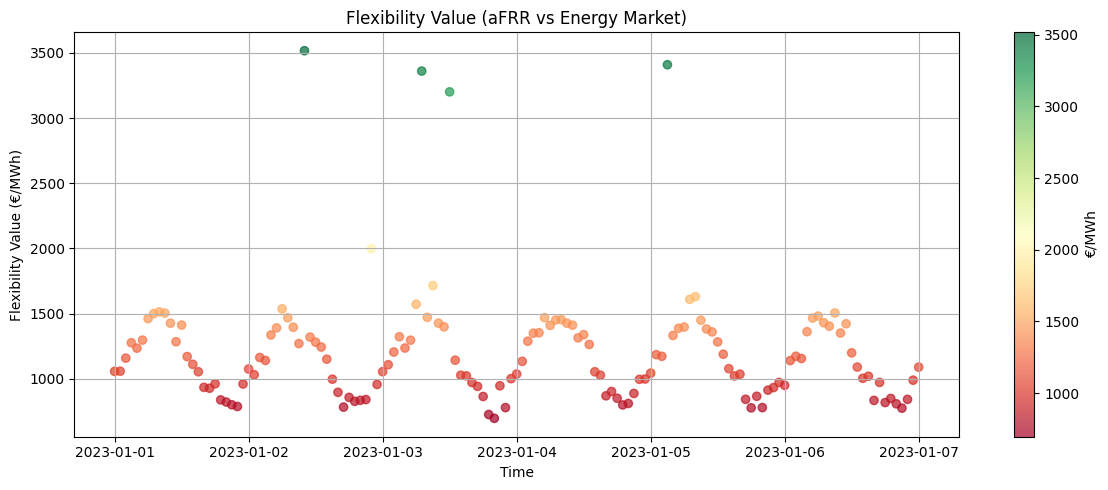

✅ Step 6: Analysis saved to:
   - figures/flexibility/flexibility_value.png
   - data/final/flexibility_opportunities.csv


In [41]:
# ======================
# Step 6: Flexibility Analysis
# ======================
def analyze_flexibility(df):
    # Simulate reserve market
    reserve_prices = []
    for dt in df["DateTime"]:
        base_price = df.loc[df["DateTime"] == dt, "Price"].values[0]
        reserve_prices.append({
            "DateTime": dt,
            "aFRR_price": base_price * 1.8 + np.random.normal(5, 2)  # 80% premium
        })
    
    df_reserves = pd.DataFrame(reserve_prices)
    df_flex = pd.merge(df, df_reserves, on="DateTime")
    df_flex["FlexValue"] = df_flex["aFRR_price"] - df_flex["Price"]
    
    # Plot
    plt.figure(figsize=(12, 5))
    plt.scatter(
        df_flex["DateTime"], 
        df_flex["FlexValue"], 
        c=df_flex["FlexValue"],
        cmap="RdYlGn",
        alpha=0.7
    )
    plt.colorbar(label="€/MWh")
    plt.title("Flexibility Value (aFRR vs Energy Market)")
    plt.xlabel("Time")
    plt.ylabel("Flexibility Value (€/MWh)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("figures/flexibility/flexibility_value.png", dpi=300)
    plt.show()
    plt.close()
    
    df_flex.to_csv("data/final/flexibility_opportunities.csv", index=False)
    print("✅ Step 6: Analysis saved to:")
    print("   - figures/flexibility/flexibility_value.png")
    print("   - data/final/flexibility_opportunities.csv")

analyze_flexibility(df_power)